In [53]:
import numpy as np
dataset = []
with open("Assignment_2_data.txt") as f:
    ct = 0
    for line in f:
        label, line = line.split("\t",1)
        if label == "spam":
            dataset.append([1,line.decode('utf8')])
        elif label == "ham":
            dataset.append([0,line.decode('utf8')])
        else:
            print("Error : ",(label, line))

np.random.shuffle(dataset)
dataset

[[0, u'No prob. I will send to your email.\n'],
 [0,
  u'Yo carlos, a few friends are already asking me about you, you working at all this weekend?\n'],
 [0, u"That's my honeymoon outfit. :)\n"],
 [0, u'Unni thank you dear for the recharge..Rakhesh\n'],
 [0,
  u'Eh sorry leh... I din c ur msg. Not sad already lar. Me watching tv now. U still in office?\n'],
 [1,
  u'tddnewsletter@emc1.co.uk (More games from TheDailyDraw) Dear Helen, Dozens of Free Games - with great prizesWith..\n'],
 [0, u'Am in gobi arts college\n'],
 [0, u'Yup...\n'],
 [0, u"Ok i'm coming home now.\n"],
 [0,
  u"What's a feathery bowa? Is that something guys have that I don't know about?\n"],
 [1,
  u'Download as many ringtones as u like no restrictions, 1000s 2 choose. U can even send 2 yr buddys. Txt Sir to 80082 \xa33 \n'],
 [0,
  u'K ill drink.pa then what doing. I need srs model pls send it to my mail id pa.\n'],
 [0,
  u'You have registered Sinco as Payee. Log in at icicibank.com and enter URN  &lt;#&gt;  to c

In [54]:
import re

pattern = re.compile("[\s\n\r\t.,:;\-_\'\"?!#&()]")

for line in dataset:
    line[1] = [x.strip() for x in pattern.split(line[1]) if x.strip() != '']

dataset

[[0, [u'No', u'prob', u'I', u'will', u'send', u'to', u'your', u'email']],
 [0,
  [u'Yo',
   u'carlos',
   u'a',
   u'few',
   u'friends',
   u'are',
   u'already',
   u'asking',
   u'me',
   u'about',
   u'you',
   u'you',
   u'working',
   u'at',
   u'all',
   u'this',
   u'weekend']],
 [0, [u'That', u's', u'my', u'honeymoon', u'outfit']],
 [0,
  [u'Unni',
   u'thank',
   u'you',
   u'dear',
   u'for',
   u'the',
   u'recharge',
   u'Rakhesh']],
 [0,
  [u'Eh',
   u'sorry',
   u'leh',
   u'I',
   u'din',
   u'c',
   u'ur',
   u'msg',
   u'Not',
   u'sad',
   u'already',
   u'lar',
   u'Me',
   u'watching',
   u'tv',
   u'now',
   u'U',
   u'still',
   u'in',
   u'office']],
 [1,
  [u'tddnewsletter@emc1',
   u'co',
   u'uk',
   u'More',
   u'games',
   u'from',
   u'TheDailyDraw',
   u'Dear',
   u'Helen',
   u'Dozens',
   u'of',
   u'Free',
   u'Games',
   u'with',
   u'great',
   u'prizesWith']],
 [0, [u'Am', u'in', u'gobi', u'arts', u'college']],
 [0, [u'Yup']],
 [0, [u'Ok', u'i', u'm

In [55]:
def get_vocab_length(dataset):
    vocab = set()
    for line in dataset:
        for token in line[1]:
            vocab.add(token)
    return len(vocab)

print(get_vocab_length(dataset))

11212


In [56]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

for line in dataset:
    line[1] = [x.lower() for x in line[1] if x not in stop_words]

print(get_vocab_length(dataset))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
9026


In [57]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
for line in dataset:
    line[1] = [stemmer.stem(x) for x in line[1]]
    
print(get_vocab_length(dataset))

7680


In [58]:
from collections import defaultdict

def get_top_vocab_words(data,topK =  2000):
    vocab = defaultdict(int)
    for line in data:
        for token in line[1]:
            vocab[token]+=1
            
    sorted_vocab = sorted(vocab.items(),key=lambda x: x[1],reverse=True)
    return sorted_vocab[:topK]

def make_indexed_map(data):
    ans = {}
    i = 0
    for line in data:
        ans[line[0]] = i
        i+=1
    return ans

max_vector_sz = 2000
myvocab = make_indexed_map(get_top_vocab_words(dataset, max_vector_sz))
myvocab

{u'sleep': 134,
 u'captain': 1726,
 u'hate': 1471,
 u'forget': 549,
 u'sorri': 39,
 u'ttyl': 1472,
 u'worth': 627,
 u'@': 742,
 u'digit': 1005,
 u'chennai': 693,
 u'everi': 153,
 u'unsold': 1582,
 u'rem': 1667,
 u'voic': 1051,
 u'affect': 1624,
 u'msg*': 1892,
 u'school': 406,
 u'prize': 104,
 u'wednesday': 1094,
 u'math': 1978,
 u'9pm': 1893,
 u'enjoy': 259,
 u'direct': 853,
 u'second': 518,
 u'street': 980,
 u'follow': 706,
 u'7th': 1819,
 u'10p': 730,
 u'air': 1397,
 u'blue': 743,
 u'hide': 1996,
 u'150p/tone': 1674,
 u'+': 397,
 u'meetin': 1524,
 u'08702840625': 1997,
 u'new': 59,
 u'net': 492,
 u'ever': 329,
 u'told': 214,
 u'med': 960,
 u'never': 253,
 u'meh': 1052,
 u'here': 1513,
 u'met': 841,
 u'100': 629,
 u'pleasur': 1122,
 u'w111wx': 1727,
 u'forum': 1998,
 u'auction': 610,
 u'k': 49,
 u'dri': 1894,
 u'credit': 425,
 u'smoke': 436,
 u'studi': 544,
 u'hiya': 1007,
 u'bro': 1386,
 u'62468': 1316,
 u'moral': 1053,
 u'txt': 28,
 u'spoke': 1350,
 u'would': 141,
 u'ec2a': 1526,
 

In [59]:
encoded_data = np.zeros((len(dataset),len(myvocab)))
i=0
for line in dataset:
    for token in line[1]:
        if token in myvocab:
            encoded_data[i,myvocab[token]] = 1
    i+=1

data_sz = len(encoded_data)
training_sz = int(data_sz * 0.8)
test_sz = data_sz - training_sz
training_X = encoded_data[0:training_sz]
test_X = encoded_data[training_sz:data_sz]
training_Y = np.array([x[0] for x in dataset[0:training_sz]]).reshape(training_sz,1)
test_Y = np.array([x[0] for x in dataset[training_sz:data_sz]]).reshape(test_sz,1)

print data_sz, training_sz, test_sz
print training_Y.shape

5574 4459 1115
(4459, 1)


In [60]:
import math

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sq_loss(x, x_):
    return np.sum(np.square((x-x_)))

def cross_ent_loss(predicted, truth):
    return -np.mean(truth*np.log(predicted) + (1-truth)*np.log(1-predicted))

def predict(Y, Y_):
    Z = (Y > 0.5)
    # print np.count_nonzero(Y_)
    Z = (Z != Y_)
    err = 100.0*np.count_nonzero(Z)/Y.shape[0]
    print "error: ", np.count_nonzero(Z), "total: ", Y.shape[0], "% error: ", err
    return err

hl_train = []
hl_test = []

class NeuralNet_sigmoid:
    def __init__(self, inl_dim, hl1_dim, hl2_dim, outl_dim):
        self.inl_dim = inl_dim
        self.hl1_dim = hl1_dim
        self.hl2_dim = hl2_dim
        self.outl_dim = outl_dim
        self.w1 = np.random.normal(size=(inl_dim, hl1_dim), scale=1)
        self.w2 = np.random.normal(size=(hl1_dim, hl2_dim), scale=1)
        self.w3 = np.random.normal(size=(hl2_dim, outl_dim), scale=1)
        self.b1 = np.zeros(hl1_dim)
        self.b2 = np.zeros(hl2_dim)
        self.b3 = np.zeros(outl_dim)
        
    def forward_pass(self, X):
        self.X = X
        t = X.dot(self.w1) + self.b1
        t = sigmoid(t)
        self.y1 = t.copy()
        t = t.dot(self.w2) + self.b2
        t = sigmoid(t)
        self.y2 = t.copy()
        t = t.dot(self.w3) + self.b3
        t = sigmoid(t)
        self.y3 = t.copy()
        return t

    def validate(self, X, Y):
        t = X.dot(self.w1) + self.b1
        t = sigmoid(t)
        t = t.dot(self.w2) + self.b2
        t = sigmoid(t)
        t = t.dot(self.w3) + self.b3
        t = sigmoid(t)
        return predict(t, Y)

    def train(self, X, Y, lr, epochs = 100, batch_sz = 1, reg = 0.0):
        for itr in range(0,epochs):
            
            print "epoch: ", itr
            print "train error:"
            hl_train.append(self.validate(training_X, training_Y))
            print "test error:"
            hl_test.append(self.validate(test_X, test_Y))
            
            for itr2 in range(0, int(math.ceil(float(X.shape[0])/batch_sz))):
                ds_X = X[batch_sz*itr2:min(batch_sz*(itr2+1),X.shape[0])]
                ds_Y = Y[batch_sz*itr2:min(batch_sz*(itr2+1),Y.shape)]
                self.forward_pass(ds_X)
                l = sq_loss(self.y3, ds_Y)
                #l = cross_ent_loss(self.y3, ds_Y)
                l += reg*(np.sum(np.square(self.w1)) + np.sum(np.square(self.w2)) + np.sum(np.square(self.w3)))
                #print "itr: ", itr, " loss: ", l

                #db3 = (self.y3 - ds_Y)/(ds_Y.shape[0])
                db3 = ((self.y3 - ds_Y)*2)*(self.y3 - np.square(self.y3))
                dw3 = self.y2.T.dot(db3)
                db2 = db3.dot(self.w3.T)*(self.y2 - np.square(self.y2))
                dw2 = self.y1.T.dot(db2)
                db1 = db2.dot(self.w2.T)*(self.y1 - np.square(self.y1))
                dw1 = self.X.T.dot(db1)

                self.w1 -= lr * (dw1 + 2*reg*self.w1)
                self.w2 -= lr * (dw2 + 2*reg*self.w2)
                self.w3 -= lr * (dw3 + 2*reg*self.w3)
                self.b1 -= lr * db1.sum(axis = 0)
                self.b2 -= lr * db2.sum(axis = 0)
                self.b3 -= lr * db3.sum(axis = 0)
            
            
nn = NeuralNet_sigmoid(max_vector_sz, 100, 50, 1)
nn.train(training_X, training_Y, 0.1, 50, 1)

epoch:  0
train error:
error:  3012 total:  4459 % error:  67.5487777529
test error:
error:  739 total:  1115 % error:  66.2780269058
epoch:  1
train error:
error:  348 total:  4459 % error:  7.8044404575
test error:
error:  87 total:  1115 % error:  7.80269058296
epoch:  2
train error:
error:  230 total:  4459 % error:  5.15810719892
test error:
error:  67 total:  1115 % error:  6.00896860987
epoch:  3
train error:
error:  146 total:  4459 % error:  3.27427674366
test error:
error:  52 total:  1115 % error:  4.66367713004
epoch:  4
train error:
error:  108 total:  4459 % error:  2.42206772819
test error:
error:  49 total:  1115 % error:  4.39461883408
epoch:  5
train error:
error:  82 total:  4459 % error:  1.83897734918
test error:
error:  41 total:  1115 % error:  3.67713004484
epoch:  6
train error:
error:  67 total:  4459 % error:  1.5025790536
test error:
error:  40 total:  1115 % error:  3.58744394619
epoch:  7
train error:
error:  58 total:  4459 % error:  1.30074007625
test er

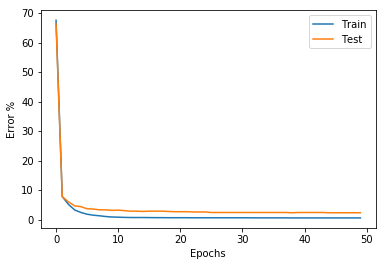

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

h1, = plt.plot([x for x in range(0, len(hl_train))], hl_train, label="Train")
h2, = plt.plot([x for x in range(0, len(hl_test))], hl_test, label="Test")
plt.xlabel("Epochs")
plt.ylabel("Error %")
plt.legend(handles=[h1,h2])

In [64]:
def predict(Y, Y_):
    Z = (Y > 0.5)
    Z = (Z != Y_)
    print "error: ", np.count_nonzero(Z), "total: ", Y.shape[0], "% error: ", 100.0*np.count_nonzero(Z)/Y.shape[0]

predict(nn.forward_pass(test_X), test_Y)

error:  26 total:  1115 % error:  2.33183856502


In [65]:
import math

def sq_loss(x, x_):
    return np.sum(np.square((x-x_)))

def cross_ent_loss(predicted, truth):
    return -np.mean(truth*np.log(predicted) + (1-truth)*np.log(1-predicted))

def predict(Y, Y_):
    Z = np.array([(1 if x >= 0 else -1) for x in Y]).reshape(Y.shape[0],1)
    Z = (Z != Y_)
    err = 100.0*np.count_nonzero(Z)/Y.shape[0]
    print "error: ", np.count_nonzero(Z), "total: ", Y.shape[0], "% error: ", err
    return err

hl_train_2 = []
hl_test_2 = []

class NeuralNet_tanh:
    def __init__(self, inl_dim, hl1_dim, hl2_dim, outl_dim):
        self.inl_dim = inl_dim
        self.hl1_dim = hl1_dim
        self.hl2_dim = hl2_dim
        self.outl_dim = outl_dim
        self.w1 = np.random.normal(size=(inl_dim, hl1_dim), scale=1)
        self.w2 = np.random.normal(size=(hl1_dim, hl2_dim), scale=1)
        self.w3 = np.random.normal(size=(hl2_dim, outl_dim), scale=1)
        self.b1 = np.zeros(hl1_dim)
        self.b2 = np.zeros(hl2_dim)
        self.b3 = np.zeros(outl_dim)
        
    def forward_pass(self, X):
        self.X = X
        t = X.dot(self.w1) + self.b1
        t = np.tanh(t)
        self.y1 = t.copy()
        t = t.dot(self.w2) + self.b2
        t = np.tanh(t)
        self.y2 = t.copy()
        t = t.dot(self.w3) + self.b3
        t = np.tanh(t)
        self.y3 = t.copy()
        return t

    def validate(self, X, Y):
        t = X.dot(self.w1) + self.b1
        t = np.tanh(t)
        t = t.dot(self.w2) + self.b2
        t = np.tanh(t)
        t = t.dot(self.w3) + self.b3
        t = np.tanh(t)
        return predict(t, Y)

    def train(self, X, Y, lr, epochs = 100, batch_sz = 1, reg = 0.0):
        for itr in range(0,epochs):
            
            print "epoch: ", itr
            hl_train_2.append(self.validate(training_X, np.array([(-1 if x == 0 else 1) for x in training_Y]).reshape(training_X.shape[0],1)))
            hl_test_2.append(self.validate(test_X, np.array([(-1 if x == 0 else 1) for x in test_Y]).reshape(test_X.shape[0],1)))
            
            for itr2 in range(0, int(math.ceil(float(X.shape[0])/batch_sz))):
                ds_X = X[batch_sz*itr2:min(batch_sz*(itr2+1),X.shape[0])]
                ds_Y = Y[batch_sz*itr2:min(batch_sz*(itr2+1),Y.shape)]
                self.forward_pass(ds_X)
                l = sq_loss(self.y3, ds_Y)
                #l = cross_ent_loss(self.y3, ds_Y)
                l += reg*(np.sum(np.square(self.w1)) + np.sum(np.square(self.w2)) + np.sum(np.square(self.w3)))

                #db3 = (self.y3 - ds_Y)/(ds_Y.shape[0])
                db3 = ((self.y3 - ds_Y)*2)*(1 - np.square(self.y3))
                dw3 = self.y2.T.dot(db3)
                db2 = db3.dot(self.w3.T)*(1 - np.square(self.y2))
                dw2 = self.y1.T.dot(db2)
                db1 = db2.dot(self.w2.T)*(1 - np.square(self.y1))
                dw1 = self.X.T.dot(db1)

                self.w1 -= lr * (dw1 + 2*reg*self.w1)
                self.w2 -= lr * (dw2 + 2*reg*self.w2)
                self.w3 -= lr * (dw3 + 2*reg*self.w3)
                self.b1 -= lr * db1.sum(axis = 0)
                self.b2 -= lr * db2.sum(axis = 0)
                self.b3 -= lr * db3.sum(axis = 0)
#                 print "itr: ", itr, " loss: ", l
            
            
nn2 = NeuralNet_tanh(max_vector_sz, 100, 50, 1)
nn2.train(training_X, np.array([(-1 if x == 0 else 1) for x in training_Y]).reshape(training_Y.shape[0],1), 0.1, 50, 1)

epoch:  0
error:  2462 total:  4459 % error:  55.2141735815
error:  634 total:  1115 % error:  56.8609865471
epoch:  1
error:  383 total:  4459 % error:  8.58936981386
error:  79 total:  1115 % error:  7.08520179372
epoch:  2
error:  274 total:  4459 % error:  6.14487553263
error:  69 total:  1115 % error:  6.18834080717
epoch:  3
error:  260 total:  4459 % error:  5.83090379009
error:  71 total:  1115 % error:  6.36771300448
epoch:  4
error:  156 total:  4459 % error:  3.49854227405
error:  52 total:  1115 % error:  4.66367713004
epoch:  5
error:  181 total:  4459 % error:  4.05920610002
error:  39 total:  1115 % error:  3.49775784753
epoch:  6
error:  149 total:  4459 % error:  3.34155640278
error:  35 total:  1115 % error:  3.13901345291
epoch:  7
error:  131 total:  4459 % error:  2.93787844808
error:  31 total:  1115 % error:  2.7802690583
epoch:  8
error:  138 total:  4459 % error:  3.09486431935
error:  35 total:  1115 % error:  3.13901345291
epoch:  9
error:  207 total:  4459 %

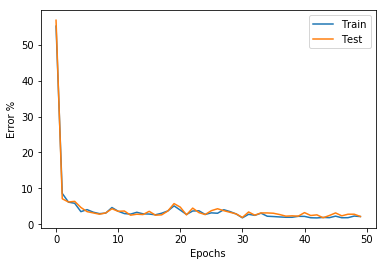

In [69]:
h1, = plt.plot([x for x in range(0, len(hl_train_2))], hl_train_2, label="Train")
h2, = plt.plot([x for x in range(0, len(hl_test_2))], hl_test_2, label="Test")
plt.xlabel("Epochs")
plt.ylabel("Error %")
plt.legend(handles=[h1,h2])

In [67]:
import math

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sq_loss(x, x_):
    return np.sum(np.square((x-x_)))

def cross_ent_loss(predicted, truth):
    return -np.mean(truth*np.log(predicted) + (1-truth)*np.log(1-predicted))

def softmax(x):
    x = np.exp(x)
    x /= np.sum(x, axis = 1, keepdims=True)
    return x

def predict(Y, Y_):
    Z = np.array([1 if x[1] >= x[0] else 0 for x in Y]).reshape(Y.shape[0],1)
    # print np.count_nonzero(Y_)
    Z = (Z != Y_)
    err = 100.0*np.count_nonzero(Z)/Y.shape[0]
    print "error: ", np.count_nonzero(Z), "total: ", Y.shape[0], "% error: ", err
    return err

hl_train_3 = []
hl_test_3 = []

class NeuralNet_sigmoid:
    def __init__(self, inl_dim, hl1_dim, hl2_dim, outl_dim):
        self.inl_dim = inl_dim
        self.hl1_dim = hl1_dim
        self.hl2_dim = hl2_dim
        self.outl_dim = outl_dim
        self.w1 = np.random.normal(size=(inl_dim, hl1_dim), scale=1)
        self.w2 = np.random.normal(size=(hl1_dim, hl2_dim), scale=1)
        self.w3 = np.random.normal(size=(hl2_dim, outl_dim), scale=1)
        self.b1 = np.zeros(hl1_dim)
        self.b2 = np.zeros(hl2_dim)
        self.b3 = np.zeros(outl_dim)
        
    def forward_pass(self, X):
        self.X = X
        t = X.dot(self.w1) + self.b1
        t = sigmoid(t)
        self.y1 = t.copy()
        t = t.dot(self.w2) + self.b2
        t = sigmoid(t)
        self.y2 = t.copy()
        t = t.dot(self.w3) + self.b3
        t = softmax(t)
        self.y3 = t.copy()
        return t

    def validate(self, X, Y):
        t = X.dot(self.w1) + self.b1
        t = sigmoid(t)
        t = t.dot(self.w2) + self.b2
        t = sigmoid(t)
        t = t.dot(self.w3) + self.b3
        t = softmax(t)
        return predict(t, Y)

    def train(self, X, Y, lr, epochs = 100, batch_sz = 1, reg = 0.0):
        for itr in range(0,epochs):
            
            print "epoch: ", itr
            hl_train_3.append(self.validate(training_X, training_Y))
            hl_test_3.append(self.validate(test_X, test_Y))
            
            for itr2 in range(0, int(math.ceil(float(X.shape[0])/batch_sz))):
                ds_X = X[batch_sz*itr2:min(batch_sz*(itr2+1),X.shape[0])]
                ds_Y = Y[batch_sz*itr2:min(batch_sz*(itr2+1),Y.shape)]
                self.forward_pass(ds_X)
                l = sq_loss(self.y3, ds_Y)
                #l = cross_ent_loss(self.y3, ds_Y)
                l += reg*(np.sum(np.square(self.w1)) + np.sum(np.square(self.w2)) + np.sum(np.square(self.w3)))
#                 print "itr: ", itr, " loss: ", l

                #db3 = (self.y3 - ds_Y)/(ds_Y.shape[0])
                dy3 = (self.y3 - ds_Y)*2
                temp = np.prod(self.y3, axis = 1, keepdims=True)
                db3 = dy3 * temp
                db3[:,1] *= -1
                db3 = np.sum(db3, axis=1, keepdims=True)
                db3 = np.repeat(db3, 2, axis = 1)
                db3[:,1] *= -1
                
                dw3 = self.y2.T.dot(db3)
                db2 = db3.dot(self.w3.T)*(self.y2 - np.square(self.y2))
                dw2 = self.y1.T.dot(db2)
                db1 = db2.dot(self.w2.T)*(self.y1 - np.square(self.y1))
                dw1 = self.X.T.dot(db1)

                self.w1 -= lr * (dw1 + 2*reg*self.w1)
                self.w2 -= lr * (dw2 + 2*reg*self.w2)
                self.w3 -= lr * (dw3 + 2*reg*self.w3)
                self.b1 -= lr * db1.sum(axis = 0)
                self.b2 -= lr * db2.sum(axis = 0)
                self.b3 -= lr * db3.sum(axis = 0)            
            
nn3 = NeuralNet_sigmoid(max_vector_sz, 100, 50, 2)
nn3.train(training_X, np.array([np.array([0,1]) if x == 1 else np.array([1,0]) for x in training_Y]), 0.1, 50, 1)

epoch:  0
error:  2240 total:  4459 % error:  50.2354788069
error:  514 total:  1115 % error:  46.0986547085
epoch:  1
error:  609 total:  4459 % error:  13.6577708006
error:  136 total:  1115 % error:  12.197309417
epoch:  2
error:  601 total:  4459 % error:  13.4783583763
error:  131 total:  1115 % error:  11.7488789238
epoch:  3
error:  475 total:  4459 % error:  10.6526126934
error:  101 total:  1115 % error:  9.05829596413
epoch:  4
error:  307 total:  4459 % error:  6.88495178291
error:  66 total:  1115 % error:  5.91928251121
epoch:  5
error:  198 total:  4459 % error:  4.44045750168
error:  51 total:  1115 % error:  4.57399103139
epoch:  6
error:  101 total:  4459 % error:  2.26508185692
error:  38 total:  1115 % error:  3.40807174888
epoch:  7
error:  86 total:  4459 % error:  1.92868356134
error:  26 total:  1115 % error:  2.33183856502
epoch:  8
error:  66 total:  4459 % error:  1.48015250056
error:  27 total:  1115 % error:  2.42152466368
epoch:  9
error:  60 total:  4459 %

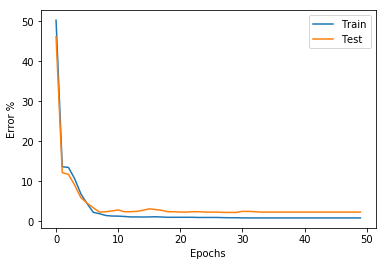

In [70]:
hl1, = plt.plot([x for x in range(0, len(hl_train_3))], hl_train_3, label="Train")
hl2, = plt.plot([x for x in range(0, len(hl_test_3))], hl_test_3, label="Test")
plt.xlabel("Epochs")
plt.ylabel("Error %")
plt.legend(handles=[h1,h2])